# Выделение сегментов клиентов банка с помощью кластеризации

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_excel("clust_sample_dev_100k.xlsx")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
идентификатор клиента                                                      100000 non-null int64
Сумма полной задолженности по кредитным картам                             100000 non-null float64
Количество активных ипотечных кредитов                                     100000 non-null int64
Количество закрытых ипотечных кредитов                                     100000 non-null int64
Суммарная задолженность по всем кредитам                                   100000 non-null float64
Суммарный баланс по всем счетам дебетовых карт клиента                     100000 non-null float64
Общая сумма списаний со всех счетов клиента за месяц                       100000 non-null float64
Зарплатный клиент (флаг)                                                   100000 non-null int64
Средняя сумма зарплатных начислений по всем счетам клиента за 3 месяца     100000 non-null float64
Средняя

In [5]:
data.describe()

,идентификатор клиента,Сумма полной задолженности по кредитным картам,Количество активных ипотечных кредитов,Количество закрытых ипотечных кредитов,Суммарная задолженность по всем кредитам,Суммарный баланс по всем счетам дебетовых карт клиента,Общая сумма списаний со всех счетов клиента за месяц,Зарплатный клиент (флаг),Средняя сумма зарплатных начислений по всем счетам клиента за 3 месяца,Средняя сумма социальных начислений по всем счетам клиента за 3 месяца,...,Образование среднее или ниже (флаг),Образование не известно (флаг),Не женат/не замужем (флаг),Женат/замужем (флаг),Семейное положение не известно (флаг),Клиент принадлежит к сегменту MASS (флаг),Клиент принадлежит к сегменту SOCIAL(флаг),Клиент принадлежит к сегменту YOUTH (флаг),Клиент принадлежит к сегменту MVS (флаг),Клиент принадлежит к сегменту VIP(флаг)
count,100000.000000,100000.000000,100000.000000,100000.00000,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,11866.805040,0.104670,0.03784,1.627340e+05,3.100504e+04,9.508726e+04,0.957400,33127.857133,2853.593092,...,0.145750,0.71606,0.099880,0.180460,0.719660,0.598610,0.208040,0.014090,0.171650,0.007610
std,28867.657797,21093.045595,0.315714,0.19927,4.635967e+05,9.215385e+04,2.115527e+05,0.201955,36114.578651,6241.029833,...,0.352857,0.45091,0.299841,0.384572,0.449168,0.490182,0.405908,0.117863,0.377078,0.086903
min,1.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25000.750000,0.000000,0.000000,0.00000,0.000000e+00,2.298512e+03,2.728543e+04,1.000000,13759.930000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50000.500000,0.000000,0.000000,0.00000,1.052100e+04,8.419080e+03,4.744298e+04,1.000000,24585.490000,0.000000,...,0.000000,1.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,75000.250000,15428.685000,0.000000,0.00000,1.050795e+05,2.524867e+04,8.947395e+04,1.000000,40853.617500,0.000000,...,0.000000,1.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,100000.000000,99999.240000,4.000000,4.00000,5.289141e+07,6.778721e+06,9.801463e+06,1.000000,981638.080000,144342.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Нахождение выбросов
Выбросы в данных помешают хорошей кластеризации. Найдите выбросы в графе "Суммарная задолженность по кредитам" и избавьтесь от них.

In [15]:
data_to_cluster = data.copy()

## Анализ признаков
Распределение признаков важно для последующей кластеризации. Найдите признаки, распределение которых вас не устраивает, и преобразуйте их соответственно. Некоторые признаки очень часто равны 0. Бинаризуйте такие вхождения.

## Примените нормировку данных к признакам

In [19]:
from sklearn.preprocessing import scale

## Матрица корреляций

In [22]:
import seaborn as sns

/home/yury/nlp/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


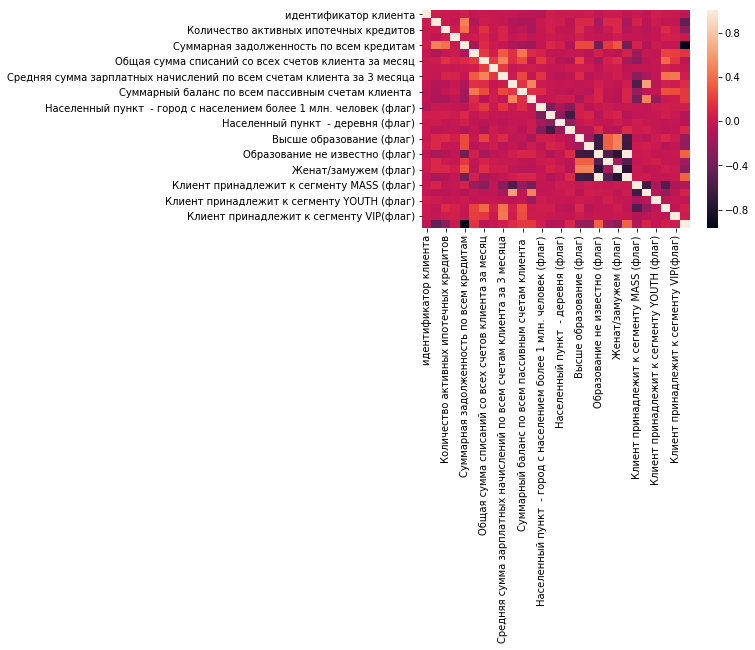

In [23]:
sns.heatmap(data_to_cluster.corr())

## Время кластеризации
Кластеризуйте данные на 9 кластеров. еременную labels_ 

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters=9, random_state=0).fit(data_to_cluster)

In [26]:
data['cluster'] = kmeans.labels_

In [33]:
means = np.stack([data[data['cluster'] == i].describe().values[1] for i in range(9)])

In [37]:
pd.options.display.max_columns = 30

In [38]:
means = pd.DataFrame(means, columns=data.columns)
means

,идентификатор клиента,Сумма полной задолженности по кредитным картам,Количество активных ипотечных кредитов,Количество закрытых ипотечных кредитов,Суммарная задолженность по всем кредитам,Суммарный баланс по всем счетам дебетовых карт клиента,Общая сумма списаний со всех счетов клиента за месяц,Зарплатный клиент (флаг),Средняя сумма зарплатных начислений по всем счетам клиента за 3 месяца,Средняя сумма социальных начислений по всем счетам клиента за 3 месяца,Суммарный баланс по всем пассивным счетам клиента,Возраст,Населенный пункт - город с населением более 1 млн. человек (флаг),Населенный пункт - город с населением менее 1 млн. человек (флаг),Населенный пункт - деревня (флаг),Населенный пункт не известен,Высше образование (флаг),Образование среднее или ниже (флаг),Образование не известно (флаг),Не женат/не замужем (флаг),Женат/замужем (флаг),Семейное положение не известно (флаг),Клиент принадлежит к сегменту MASS (флаг),Клиент принадлежит к сегменту SOCIAL(флаг),Клиент принадлежит к сегменту YOUTH (флаг),Клиент принадлежит к сегменту MVS (флаг),Клиент принадлежит к сегменту VIP(флаг),cluster
0,52133.936310,16857.645874,0.099565,0.000000,207524.016278,14095.151715,73236.460761,0.972399,26250.271692,2676.618725,2.788295e+04,43.764005,0.114400,0.493046,0.119963,0.272591,0.000000,1.000000,0.000000,0.353684,0.636474,0.009842,0.631267,0.250196,0.016689,0.101847,0.000000,0.0
1,52697.458607,9457.929356,0.202365,0.160315,463271.053233,245936.456321,713465.025348,0.989488,218576.536229,4902.078962,1.097043e+06,45.383062,0.282523,0.444152,0.028909,0.244415,0.253614,0.040736,0.705650,0.077530,0.214192,0.708279,0.000000,0.000000,0.000000,0.002628,0.997372,1.0
2,50568.811074,12297.383425,1.044932,0.003892,976911.785178,22516.058463,100402.241889,0.948169,35777.459514,1331.612836,4.839825e+04,39.043297,0.131258,0.446135,0.067044,0.355563,0.016098,0.007253,0.976650,0.004599,0.012913,0.982487,0.634707,0.097824,0.007076,0.260393,0.000000,2.0
3,50707.713074,17548.927740,0.179894,0.000000,349261.060928,25562.750660,147919.294208,0.974074,40111.872286,2150.529496,5.508088e+04,39.403002,0.196702,0.452232,0.074526,0.276540,1.000000,0.000000,0.000000,0.366764,0.628161,0.005074,0.579640,0.141996,0.022992,0.255371,0.000000,3.0
4,49111.870307,5100.229512,0.005792,0.002586,41017.042422,106898.358020,205335.447766,0.987486,67781.540671,4837.665386,4.521976e+05,46.145939,0.200951,0.408626,0.057193,0.333230,0.005999,0.002586,0.991416,0.002689,0.004551,0.992760,0.004447,0.001138,0.000000,0.994415,0.000000,4.0
5,47507.333520,6565.089337,0.006861,0.000280,27757.836528,33614.198832,58598.589802,0.942733,22510.084079,10850.042181,7.978876e+04,54.372342,0.140647,0.350392,0.085620,0.423341,0.002940,0.001820,0.995239,0.000420,0.001750,0.997830,0.000000,0.999090,0.000000,0.000910,0.000000,5.0
6,49043.383225,584.584524,0.000000,0.000000,0.001903,22770.117969,55236.760332,0.948903,25277.895208,0.000000,5.196887e+04,41.133540,0.156954,0.325345,0.073031,0.444670,0.001040,0.001337,0.997623,0.000000,0.000000,1.000000,0.980195,0.000000,0.018617,0.001188,0.000000,6.0
7,50503.534924,8951.042193,0.167289,1.037942,254619.375861,31430.874335,138457.070060,0.956022,40154.214363,2068.860920,8.995859e+04,40.687988,0.130210,0.448405,0.089106,0.332279,0.228227,0.114976,0.656798,0.082208,0.256970,0.660822,0.569704,0.130785,0.002300,0.297212,0.000000,7.0
8,50914.382330,24130.368420,0.000104,0.000000,68869.272678,9472.544841,56192.334408,0.942084,22931.782362,25.414421,1.778119e+04,39.286057,0.134879,0.383779,0.115315,0.366027,0.000362,0.000207,0.999431,0.000000,0.000000,1.000000,0.946587,0.011128,0.023860,0.018426,0.000000,8.0
